In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
pwd

'/Users/xinyuwang/Desktop/ML-Capstone-master/data'

In [41]:
data = pd.read_csv('train_weekly.csv')
test_data = pd.read_csv('test_weekly.csv')
data.Time = pd.to_datetime(data.Time)
test_data.Time = pd.to_datetime(test_data.Time)
# data = data.iloc[::-1].reset_index(drop = True)
# test_data = test_data.iloc[::-1].reset_index(drop = True)

In [42]:
data.drop(['Unnamed: 0'], axis = 1, inplace=True)
test_data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [43]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Signal', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L',
       'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV',
       'JNK_Volume', 'Flag'],
      dtype='object')

In [44]:
test_data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Signal', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L',
       'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV',
       'JNK_Volume', 'Flag'],
      dtype='object')

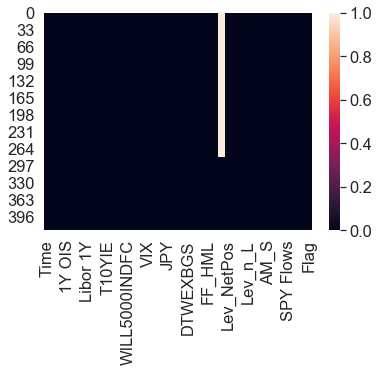

In [230]:
sns.heatmap(data.isnull())
plt.show()

__Lag the CoT Data__

In [45]:
def lag_data(data, lag_variable_lst, rewrite_lst):
    if lag_variable_lst:
        data[['lag_'+v for v in lag_variable_lst]] = data[lag_variable_lst].shift(1)
    if rewrite_lst:
        data[rewrite_lst] = data[rewrite_lst].shift(1)
    return data

In [46]:
def diff_data(data, variable_lst):
    data[['diff_'+v for v in variable_lst]] = data[variable_lst].shift(1)
    return data

In [47]:
lag = ['Libor 3 mo', 'Libor 6 mo', 'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'JPY', 'EUR']
rw = ['AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S',
       'Lev_L', 'Lev_S','Lev_NetPos']
data = diff_data(lag_data(data, ['AM_NetPos'], rw), lag)
test_data = diff_data(lag_data(test_data, ['AM_NetPos'], rw), lag)

In [48]:
data.drop(['Signal', 'Flag'], axis = 1, inplace = True)
test_data.drop(['Signal', 'Flag'], axis = 1, inplace = True)

In [49]:
data = data.dropna().reset_index(drop = True)
test_data = test_data.dropna().reset_index(drop = True)

In [50]:
p = len(data.columns)
p

46

In [51]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume',
       'lag_AM_NetPos', 'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y',
       'diff_T10Y3M', 'diff_T10Y2Y', 'diff_JPY', 'diff_EUR'],
      dtype='object')

## Baseline Model on Positioning 

### Ridge Regression

In [13]:
time_periods = data['Time']
X_train_base = data.iloc[:,2:p-2]
y_train_base = data.iloc[:,1]

X_test_base = test_data.iloc[:,2:p-2]
y_test_base = test_data.iloc[:,1]

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
scaler = StandardScaler()
scaler.fit(X_train_base)
X_train_std_base = scaler.transform(X_train_base)
X_test_std_base = scaler.transform(X_test_base)

In [15]:
from sklearn.linear_model import Ridge, RidgeCV
ridge_base = RidgeCV(alphas = np.linspace(0.1,1,100))
ridge_base.fit(X_train_std_base, y_train_base)

RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [241]:
ridge_base.alpha_

0.1272727272727273

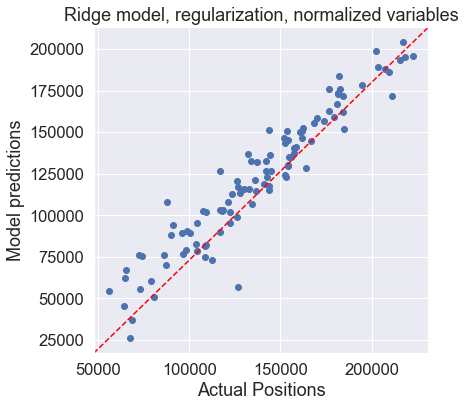

In [242]:
y_pred_base = ridge_base.predict(X_test_std_base)

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test_base, y_pred_base)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.title('Ridge model, regularization, normalized variables')
plt.ylabel('Model predictions')
plt.xlabel('Actual Positions')
plt.show()
# print(string_score)

(-0.05244627058970836,
 1.3213716823838757,
 -55744.018561628836,
 63536.558708502016)

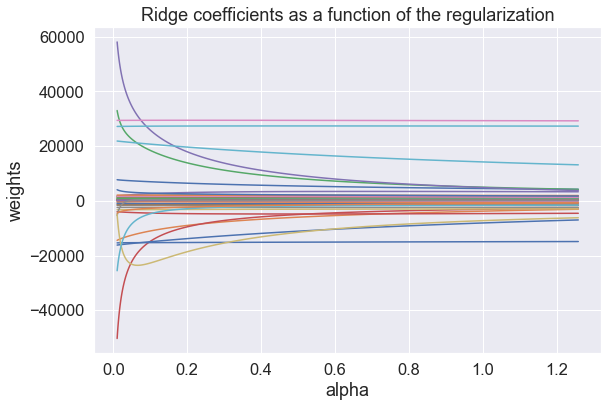

In [243]:
clf = Ridge()

coefs = []
errors = []

alphas = np.logspace(-2,0.1,100)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train_std_base, y_train_base)
    coefs.append(clf.coef_)
    

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


In [244]:
res_before2020_base = pd.DataFrame(index = ['Ridge','Lasso'], columns = ['MSE', 'MAE'])
res_2020_base = pd.DataFrame(index = ['Ridge','Lasso'], columns = ['MSE', 'MAE'])

In [245]:
ind_year2020_base = np.where(test_data['Time'] > "2020-01-01")[0][0]

In [246]:
res_before2020_base.loc['Ridge', 'MSE'] = mean_squared_error(y_test_base[:ind_year2020_base], ridge_base.predict(X_test_std_base[:ind_year2020_base,:]))
res_before2020_base.loc['Ridge', 'MAE'] = mean_absolute_error(y_test_base[:ind_year2020_base], ridge_base.predict(X_test_std_base[:ind_year2020_base,:]))

In [247]:
res_2020_base.loc['Ridge', 'MSE'] = mean_squared_error(y_test_base[ind_year2020_base:], ridge_base.predict(X_test_std_base[ind_year2020_base:,:]))
res_2020_base.loc['Ridge', 'MAE'] = mean_absolute_error(y_test_base[ind_year2020_base:], ridge_base.predict(X_test_std_base[ind_year2020_base:,:]))

### Lasso Regression

In [248]:
from sklearn.linear_model import LassoCV
lasso_base = LassoCV(max_iter = 10000, alphas = np.logspace(0.1,3,100))
lasso_base.fit(X_train_std_base, y_train_base)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188146205.6981659, tolerance: 106819367.37972337
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212459204.01213074, tolerance: 106819367.37972337
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187601620.65652847, tolerance: 106819367.37972337
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You

LassoCV(alphas=array([   1.25892541,    1.34676844,    1.44074081,    1.54127022,
          1.64881419,    1.76386217,    1.88693776,    2.0186011 ,
          2.1594514 ,    2.3101297 ,    2.47132176,    2.64376119,
          2.82823278,    3.0255761 ,    3.23668929,    3.46253315,
          3.70413553,    3.96259601,    4.23909088,    4.53487851,
          4.85130507,    5.18981068,    5.55193591,    5.93932887,
          6.35375264,    6.79709332,    7.27136862,    7.77873705,
          8.32150772,    8.90215085,    9....
        161.84187792,  173.13458823,  185.21526088,  198.1388769 ,
        211.96425366,  226.75431259,  242.57636554,  259.50242114,
        277.60951248,  296.98004774,  317.70218523,  339.87023462,
        363.58508612,  388.9546697 ,  416.09444628,  445.12793318,
        476.1872663 ,  509.41380148,  544.95875783,  582.98390597,
        623.66230422,  667.17908629,  713.7323038 ,  763.53382765,
        816.81031231,  873.8042273 ,  934.77496078, 1000.        ]),

In [249]:
np.log(lasso_base.alpha_)

5.019170334021364

In [250]:
X_train_base.columns[np.abs(lasso_base.coef_ - 0) > 1e-4]

Index(['T10Y3M', 'T10YIE', 'JNK_Price', 'SPX', 'GOLD_price', 'VIX', 'GVZCLS',
       'JPY', 'EUR', 'FF_Mkt', 'FF_SMB', 'FF_HML', 'FF_MOM', 'Lev_n_S', 'AM_L',
       'Lev_L', 'SPY Flows', 'JNK_Volume', 'lag_AM_NetPos', 'diff_T10Y3M'],
      dtype='object')

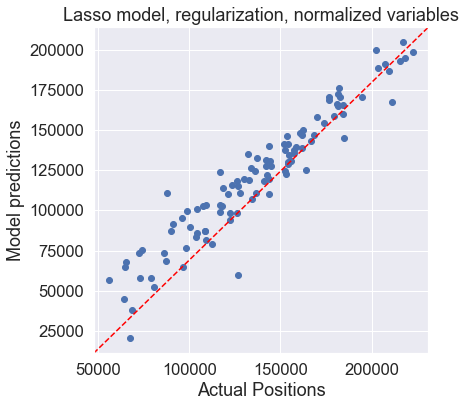

In [251]:
y_pred_base_lasso = lasso_base.predict(X_test_std_base)

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test_base, y_pred_base_lasso)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.title('Lasso model, regularization, normalized variables')
plt.ylabel('Model predictions')
plt.xlabel('Actual Positions')
plt.show()

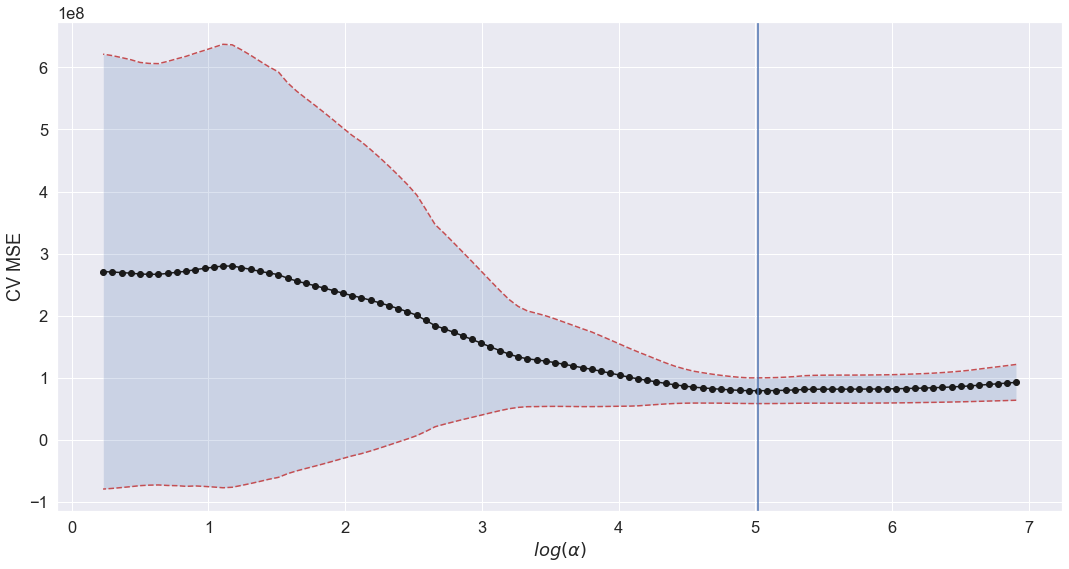

In [252]:
alpha_range_base = lasso_base.alphas_
mse_values_base = lasso_base.mse_path_.mean(axis = 1)
sd_values_base = lasso_base.mse_path_.std(axis = 1)
plt.figure(figsize = [18,9])
plt.plot(np.log(alpha_range_base), mse_values_base ,"ko-")
plt.plot(np.log(alpha_range_base), mse_values_base + sd_values_base,"r--")
plt.plot(np.log(alpha_range_base), mse_values_base - sd_values_base,"r--")
plt.fill_between(np.log(alpha_range_base),
                mse_values_base + sd_values_base,
                mse_values_base - sd_values_base, alpha = .2)

plt.axvline(np.log(lasso_base.alpha_))
plt.xlabel(r"$log(\alpha)$")
plt.ylabel("CV MSE");

In [253]:
res_before2020_base.loc['Lasso', 'MSE'] = mean_squared_error(y_test_base[:ind_year2020_base], lasso_base.predict(X_test_std_base[:ind_year2020_base,:]))
res_before2020_base.loc['Lasso', 'MAE'] = mean_absolute_error(y_test_base[:ind_year2020_base], lasso_base.predict(X_test_std_base[:ind_year2020_base,:]))

In [254]:
res_2020_base.loc['Lasso', 'MSE'] = mean_squared_error(y_test_base[ind_year2020_base:], lasso_base.predict(X_test_std_base[ind_year2020_base:,:]))
res_2020_base.loc['Lasso', 'MAE'] = mean_absolute_error(y_test_base[ind_year2020_base:], lasso_base.predict(X_test_std_base[ind_year2020_base:,:]))

In [255]:
res_before2020_base

,MSE,MAE
Ridge,3.54622e+08,15122.4
Lasso,4.16473e+08,16903.9


In [256]:
res_2020_base

,MSE,MAE
Ridge,4.63477e+08,19419.2
Lasso,4.26658e+08,17812.7


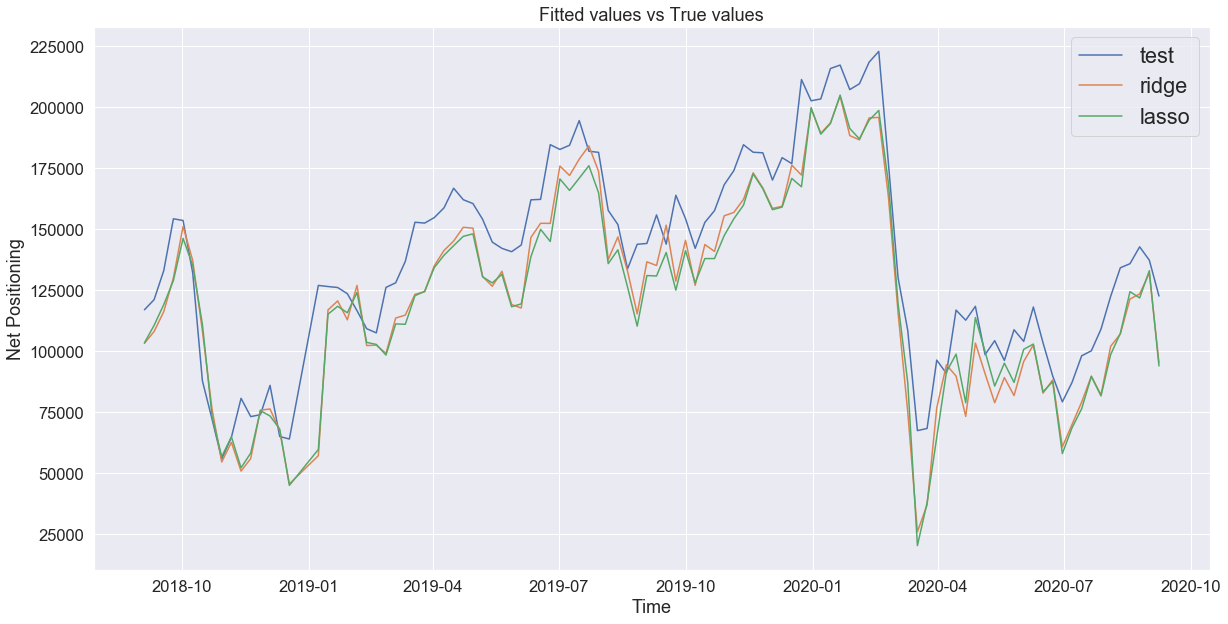

In [257]:
fig = plt.figure(figsize = [20,10])
plt.plot(test_data['Time'], y_test_base, label = 'test')
plt.plot(test_data['Time'], ridge_base.predict(X_test_std_base), label = 'ridge')
plt.plot(test_data['Time'], lasso_base.predict(X_test_std_base), label = 'lasso')
plt.xlabel("Time")
plt.ylabel("Net Positioning")
plt.title('Fitted values vs True values')
plt.legend(fontsize = 'large')

## Study Positioning Dynamics

In [52]:
data['dNetPos'] = data['AM_NetPos'].diff()
test_data['dNetPos'] = test_data['AM_NetPos'].diff()
#data['dNetPos_log_rate'] = np.log(data['AM_NetPos']).diff() 
#test_data['dNetPos_log_rate'] = np.log(test_data['AM_NetPos']).diff()

In [53]:
data = data.dropna().reset_index(drop = True)
test_data = test_data.dropna().reset_index(drop = True)

In [27]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume',
       'lag_AM_NetPos', 'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y',
       'diff_T10Y3M', 'diff_T10Y2Y', 'diff_JPY', 'diff_EUR', 'dNetPos'],
      dtype='object')

In [28]:
p = len(data.columns)
p

47

In [54]:
test_data

,Time,AM_NetPos,FedFunds,1Y OIS,Libor 3 mo,Libor 6 mo,Libor 1Y,T10Y3M,T10Y2Y,T10YIE,...,JNK_Volume,lag_AM_NetPos,diff_Libor 3 mo,diff_Libor 6 mo,diff_Libor 1Y,diff_T10Y3M,diff_T10Y2Y,diff_JPY,diff_EUR,dNetPos
0,2018-09-11,121059,0.0192,0.024540,0.02334,0.02558,0.028685,0.0083,0.0022,0.0212,...,4516260,116924.0,0.02323,0.02539,0.028429,0.0077,0.0024,0.002564,0.009757,4135.0
1,2018-09-18,132961,0.0192,0.024880,0.02338,0.02568,0.028795,0.0088,0.0024,0.0213,...,2979960,121059.0,0.02334,0.02558,0.028685,0.0083,0.0022,0.001339,-0.002068,11902.0
2,2018-09-25,154224,0.0193,0.024970,0.02381,0.02595,0.029119,0.0089,0.0027,0.0216,...,3154860,132961.0,0.02338,0.02568,0.028795,0.0088,0.0024,0.006629,-0.005228,21263.0
3,2018-10-02,153520,0.0218,0.025135,0.02408,0.02607,0.029248,0.0082,0.0023,0.0212,...,4269720,154224.0,0.02381,0.02595,0.029119,0.0089,0.0027,0.005423,-0.008498,-704.0
4,2018-10-09,131991,0.0218,0.025560,0.02420,0.02629,0.029620,0.0096,0.0033,0.0217,...,7235040,153520.0,0.02408,0.02607,0.029248,0.0082,0.0023,0.006252,0.018964,-21529.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2020-08-11,134130,0.0010,0.000500,0.00254,0.00337,0.004581,0.0053,0.0048,0.0163,...,6418380,122424.0,0.00249,0.00306,0.004509,0.0043,0.0041,0.006026,-0.007371,11706.0
99,2020-08-18,135808,0.0009,0.000520,0.00253,0.00315,0.004471,0.0058,0.0053,0.0168,...,5206320,134130.0,0.00254,0.00337,0.004581,0.0053,0.0048,0.007348,0.005366,1678.0
100,2020-08-25,142723,0.0009,0.000550,0.00251,0.00308,0.004400,0.0058,0.0054,0.0170,...,5659580,135808.0,0.00253,0.00315,0.004471,0.0058,0.0053,-0.010225,-0.016009,6915.0
101,2020-09-01,137263,0.0009,0.000504,0.00251,0.00303,0.004326,0.0056,0.0055,0.0176,...,5501840,142723.0,0.00251,0.00308,0.004400,0.0058,0.0054,0.009363,0.008112,-5460.0


In [55]:
# For training purpose
time_periods = data['Time']
X_train = data.iloc[:,2:p-1]
y_train = data.iloc[:,-1]
#y_train_gr = data.iloc[:,-1]
#y_train_alter = weekly_data.iloc[:,2]
X_test = test_data.iloc[:,2:p-1]
y_test = test_data.iloc[:,-1]
#y_test_gr = test_data.iloc[:,-1]
#y_test_alter = test_weekly_data.iloc[:,2]

In [30]:
X_train.columns

Index(['FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo', 'Libor 1Y', 'T10Y3M',
       'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX', 'WILL5000INDFC', 'NASDAQCOM',
       'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS', 'JPY', 'EUR', 'USDX_Close',
       'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML', 'FF_MOM', 'Lev_NetPos',
       'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L',
       'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume', 'lag_AM_NetPos',
       'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y', 'diff_T10Y3M',
       'diff_T10Y2Y', 'diff_JPY', 'diff_EUR'],
      dtype='object')

In [31]:
y_train.head()

0   -17663.0
1    -1699.0
2    23534.0
3    -4359.0
4     -346.0
Name: dNetPos, dtype: float64

In [32]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume',
       'lag_AM_NetPos', 'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y',
       'diff_T10Y3M', 'diff_T10Y2Y', 'diff_JPY', 'diff_EUR', 'dNetPos'],
      dtype='object')

### Modeling

For starters, we want to try some basic regression-based model: ridge, lasso, GAM.

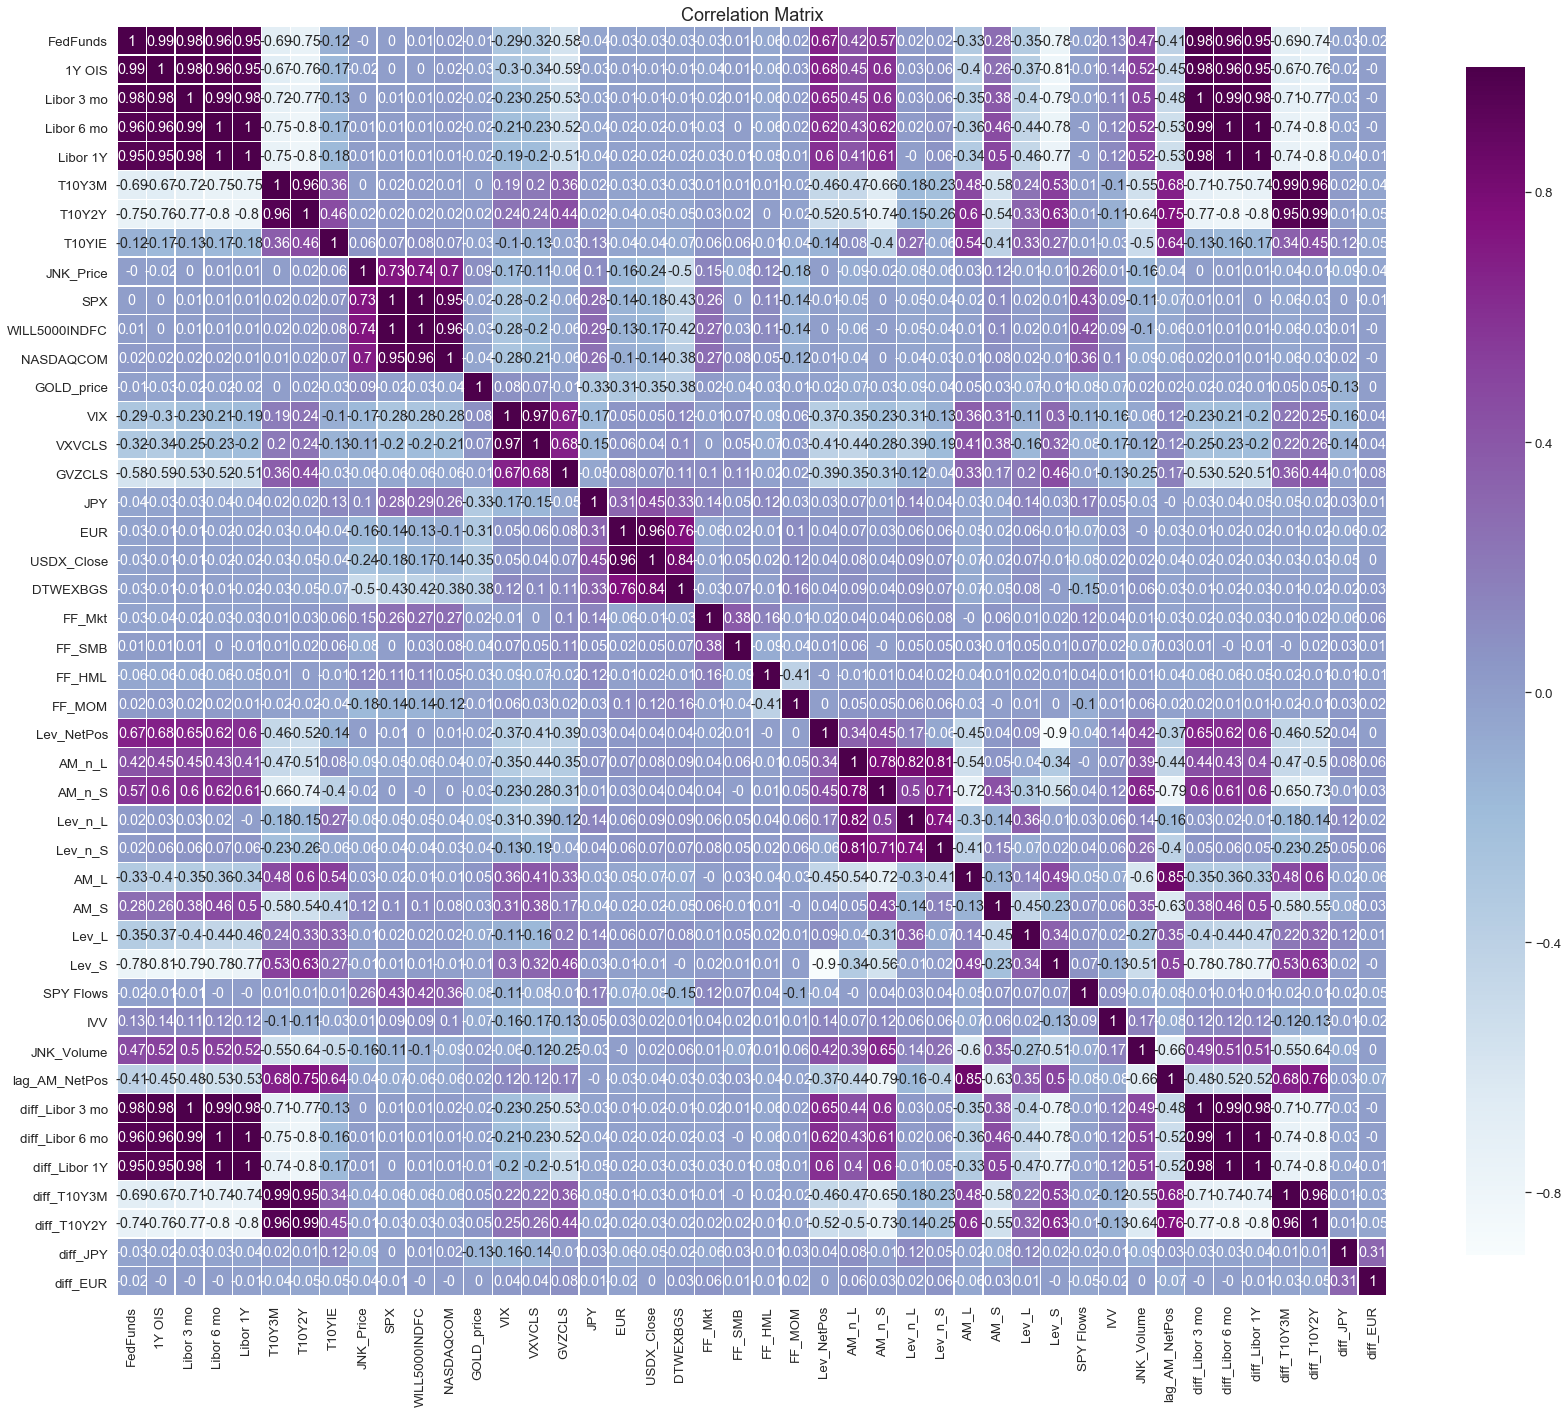

In [33]:
sns.set(font_scale = 1.2)
f, ax = plt.subplots(figsize=(24, 24))
ax = sns.heatmap(np.around(X_train.corr(),2), square=True,linewidths=.3,annot=True,cbar_kws={"shrink": .7}, cmap="BuPu")
plt.tight_layout()
plt.title('Correlation Matrix',size=18)
plt.show()

In [29]:
def tsplot(y, lags=None, figsize = (10,8), style = 'bmh',title='Time Series of Log Ret'):
    import statsmodels.tsa.api as smt
    import statsmodels.api as sm
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan = 2)
        acf_ax = plt.subplot2grid(layout, (1,1))
        qq_ax = plt.subplot2grid(layout, (1,0))
        y.plot(ax = ts_ax)
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags = lags, ax=acf_ax,alpha = 0.05)
        sm.qqplot(y, line = 's', ax=qq_ax)
        qq_ax.set_title('QQ PLot')
        plt.tight_layout()

#### Standardization

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [36]:
res_before2020 = pd.DataFrame(index = ['Ridge', 'Lasso', 'Random Forest'], columns = ['MSE', 'MAE'])
res_2020 = pd.DataFrame(index = ['Ridge', 'Lasso', 'Random Forest'], columns = ['MSE', 'MAE'])

#### Rolling Test Machine

In [37]:
def rolling_pred(X_train, X_test, model, cv_splitter):
    '''
    return rolling prediction
    '''
    

In [38]:
ind_year2020 = np.where(test_data['Time'] > "2020-01-01")[0][0]

#### Ridge

In [39]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
tscv = TimeSeriesSplit(n_splits = 5)

In [41]:
ridge = RidgeCV(alphas = np.logspace(0.1,2,50), cv = tscv)
ridge.fit(X_train_std, y_train)

RidgeCV(alphas=array([  1.25892541,   1.37649776,   1.50505032,   1.64560853,
         1.79929362,   1.96733152,   2.15106266,   2.35195264,
         2.57160393,   2.8117687 ,   3.0743627 ,   3.36148062,
         3.67541279,   4.01866341,   4.39397056,   4.80432804,
         5.25300922,   5.74359321,   6.27999335,   6.86648845,
         7.50775694,   8.20891416,   8.97555318,   9.81378942,
        10.73030941,  11.73242415,  12.82812743,  14.02615957,
        15.33607719,  16.76832937,  18.33434107,  20.04660423,
        21.91877742,  23.96579481,  26.20398529,  28.6512027 ,
        31.32696828,  34.25262639,  37.45151475,  40.94915062,
        44.77343434,  48.95487189,  53.52681823,  58.52574339,
        63.99152336,  69.96775821,  76.50211983,  83.64673228,
        91.4585875 , 100.        ]),
        cv=TimeSeriesSplit(max_train_size=None, n_splits=5))

In [42]:
ridge.alpha_

76.502119832752

In [43]:
res_before2020.loc['Ridge', 'MSE'] = mean_squared_error(y_test[:ind_year2020], ridge.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Ridge', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], ridge.predict(X_test_std[:ind_year2020,:]))

In [44]:
res_2020.loc['Ridge', 'MSE'] = mean_squared_error(y_test[ind_year2020:], ridge.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Ridge', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], ridge.predict(X_test_std[ind_year2020:,:]))

#### Lasso

In [45]:
lasso = LassoCV(max_iter = 100000, cv = tscv)
lasso.fit(X_train_std, y_train)

LassoCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5), max_iter=100000)

In [46]:
np.log(lasso.alpha_)

6.159307112657825

In [47]:
alpha_range = lasso.alphas_
mse_values = lasso.mse_path_.mean(axis = 1)
sd_values = lasso.mse_path_.std(axis = 1)

In [48]:
alpha_min_ind = np.where(np.abs(np.log(alpha_range) - np.log(lasso.alpha_)) < 1e-4)[0]
alpha_1se_ind = len(mse_values) - np.searchsorted(mse_values[::-1], mse_values[alpha_min_ind]+sd_values[alpha_min_ind])
alpha_1se = alpha_range[alpha_1se_ind]

In [49]:
# 1se
from sklearn.linear_model import Lasso
lasso_1se = Lasso(alpha = alpha_1se, max_iter = 10000)
lasso_1se.fit(X_train_std, y_train)

Lasso(alpha=array([3837.46122691]), max_iter=10000)

Test lasso

In [50]:
res_before2020.loc['Lasso', 'MSE'] = mean_squared_error(y_test[:ind_year2020], lasso.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Lasso', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], lasso.predict(X_test_std[:ind_year2020,:]))

In [51]:
res_2020.loc['Lasso', 'MSE'] = mean_squared_error(y_test[ind_year2020:], lasso.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Lasso', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], lasso.predict(X_test_std[ind_year2020:,:]))

Test lasso1se

In [52]:
res_before2020.loc['Lasso1se', 'MSE'] = mean_squared_error(y_test[:ind_year2020], lasso_1se.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Lasso1se', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], lasso_1se.predict(X_test_std[:ind_year2020,:]))

In [53]:
res_2020.loc['Lasso1se', 'MSE'] = mean_squared_error(y_test[ind_year2020:], lasso_1se.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Lasso1se', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], lasso_1se.predict(X_test_std[ind_year2020:,:]))

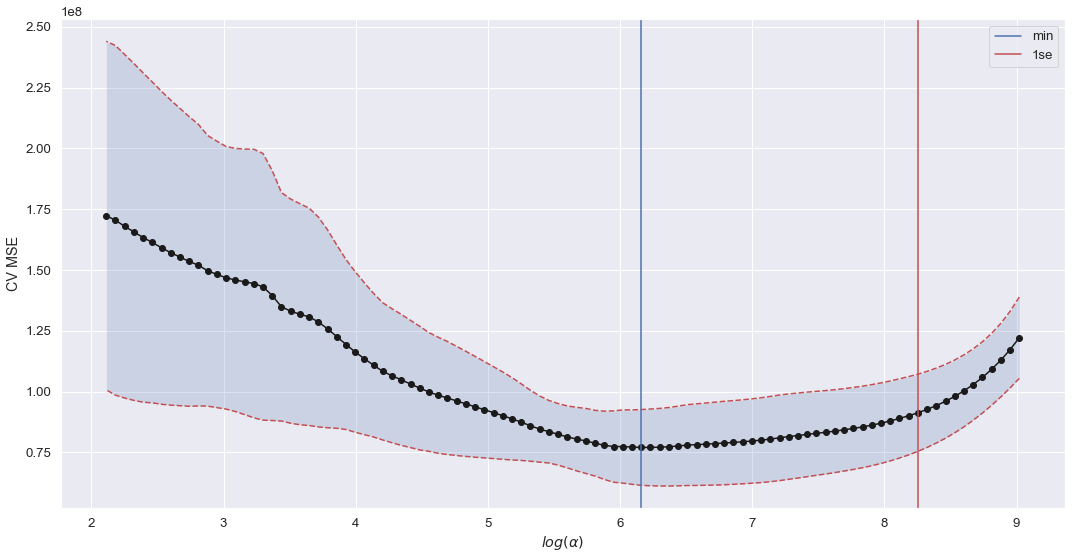

In [54]:
plt.figure(figsize = [18,9])
plt.plot(np.log(alpha_range), mse_values ,"ko-")
plt.plot(np.log(alpha_range), mse_values + sd_values,"r--")
plt.plot(np.log(alpha_range), mse_values - sd_values,"r--")
plt.fill_between(np.log(alpha_range),
                mse_values + sd_values,
                mse_values - sd_values, alpha = .2)

plt.axvline(np.log(lasso.alpha_), label = 'min')
plt.axvline(np.log(alpha_1se), label = '1se', color = 'r')
plt.legend()
plt.xlabel(r"$log(\alpha)$")
plt.ylabel("CV MSE");

__Useful variables selected by LASSO__

In [55]:
X_train.columns[np.abs(lasso.coef_ - 0) > 1e-4]

Index(['SPX', 'GOLD_price', 'VIX', 'EUR', 'FF_Mkt', 'FF_SMB', 'AM_S', 'Lev_L',
       'SPY Flows', 'JNK_Volume', 'lag_AM_NetPos', 'diff_EUR'],
      dtype='object')

In [56]:
X_train.columns[np.abs(lasso_1se.coef_ - 0) > 1e-4]

Index(['SPX'], dtype='object')

#### RandomForest

In [57]:
X_train_std.shape

(422, 44)

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20, max_features = 'sqrt')
rf.fit(X_train_std, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=20)

In [59]:
res_before2020.loc['Random Forest', 'MSE'] = mean_squared_error(y_test[:ind_year2020], rf.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Random Forest', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], rf.predict(X_test_std[:ind_year2020,:]))

In [60]:
res_2020.loc['Random Forest', 'MSE'] = mean_squared_error(y_test[ind_year2020:], rf.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Random Forest', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], rf.predict(X_test_std[ind_year2020:,:]))

In [61]:
from sklearn import preprocessing

x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = X_train.columns
from rfpimp import *
x = dropcol_importances(rf,df,y_train)
del x.index.name

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


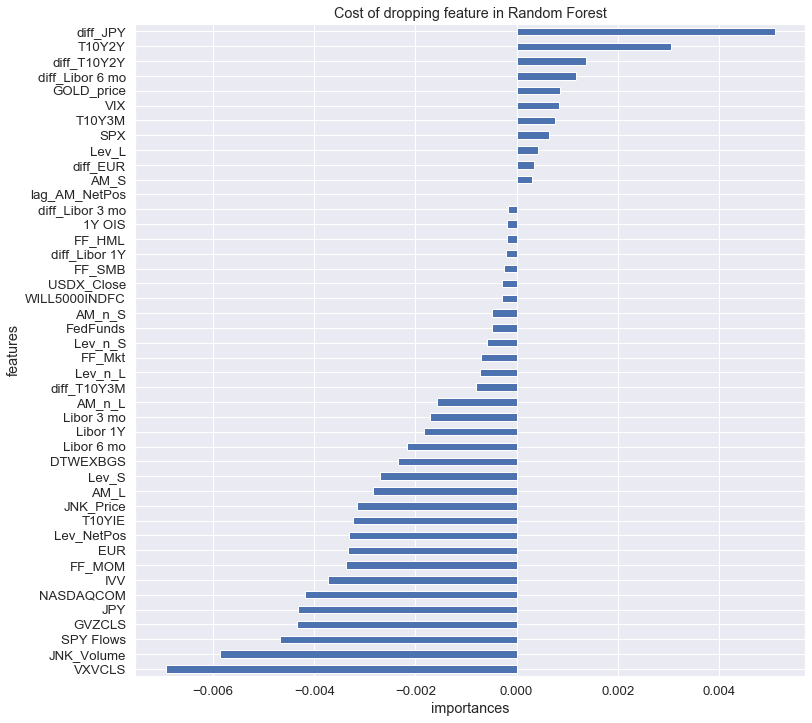

In [62]:
drop_cost = x.squeeze()
fis = np.argsort(drop_cost)
feat_importance = drop_cost[fis]
fig = plt.figure(figsize = [12,12])
ax = fig.subplots(1,1)
feat_importance.plot(kind = 'barh', ax = ax)
plt.ylabel('features')
plt.xlabel('importances')
plt.title("Cost of dropping feature in Random Forest")
plt.show()

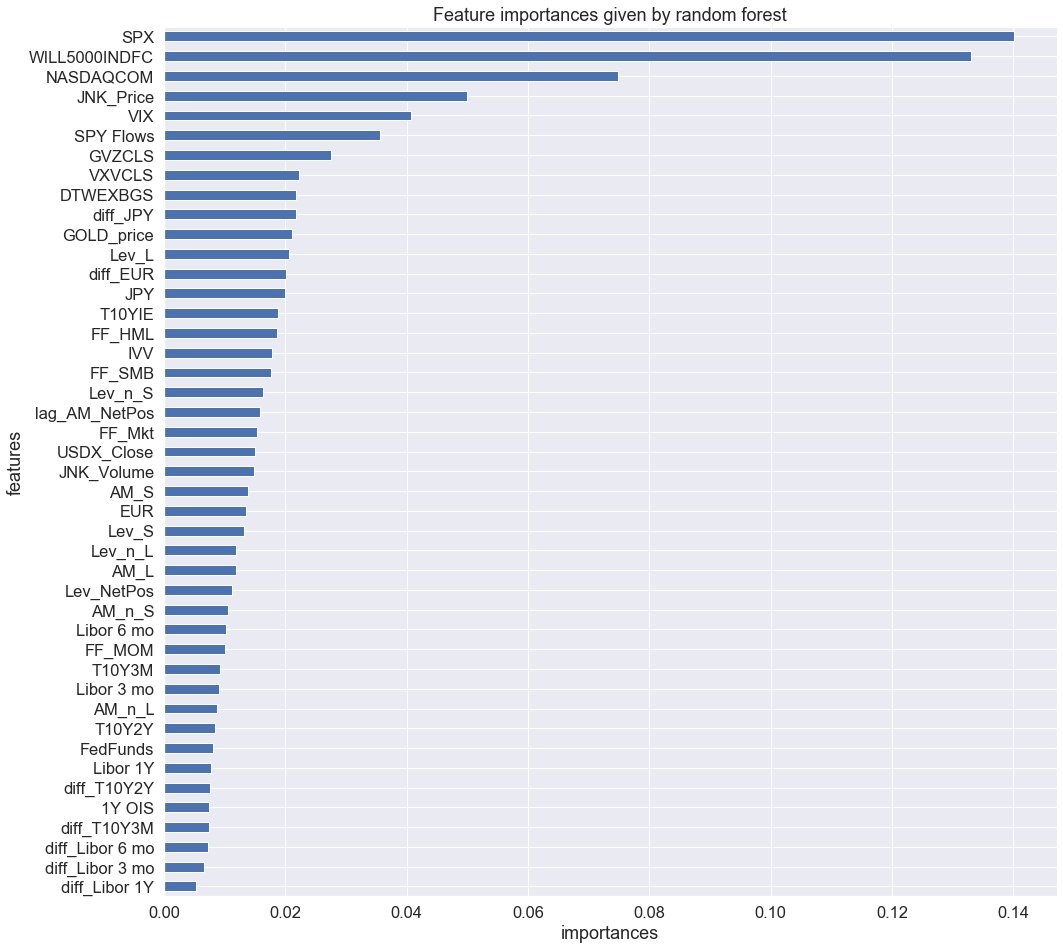

In [63]:
feat_importance = pd.Series(rf.feature_importances_, index = X_train.columns)
sns.set(font_scale = 1.5)
fis = np.argsort(feat_importance)
feat_importance = feat_importance[fis]
fig = plt.figure(figsize = [16,16])
ax = fig.subplots(1,1)
feat_importance.plot(kind = 'barh', ax = ax)
plt.ylabel('features')
plt.xlabel('importances')
plt.title("Feature importances given by random forest")
plt.show()

In [64]:
features_all = list(feat_importance.index)
features = list(feat_importance[-10:].index)
X_train_ppd = pd.DataFrame(columns = [])
for i in features_all:
    index = X_train.columns.get_loc(i)
    X_train_ppd[i] = X_train_std[:,index]

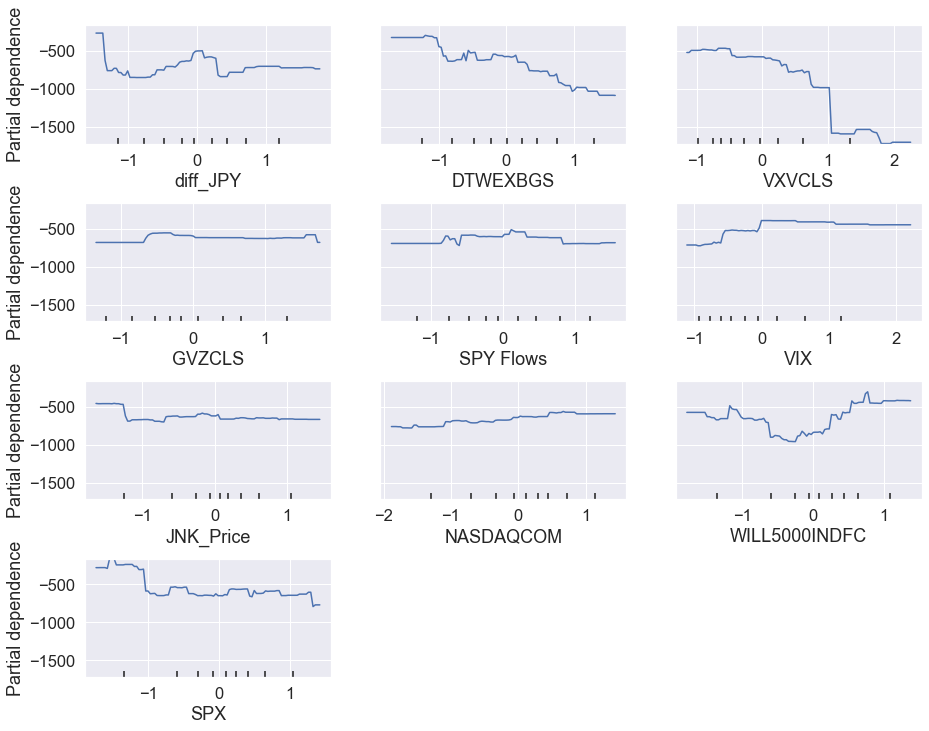

In [65]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(rf, X_train_ppd, features)
fig = plt.gcf()
fig.set_size_inches(15,12)
fig.subplots_adjust(hspace=0.5)

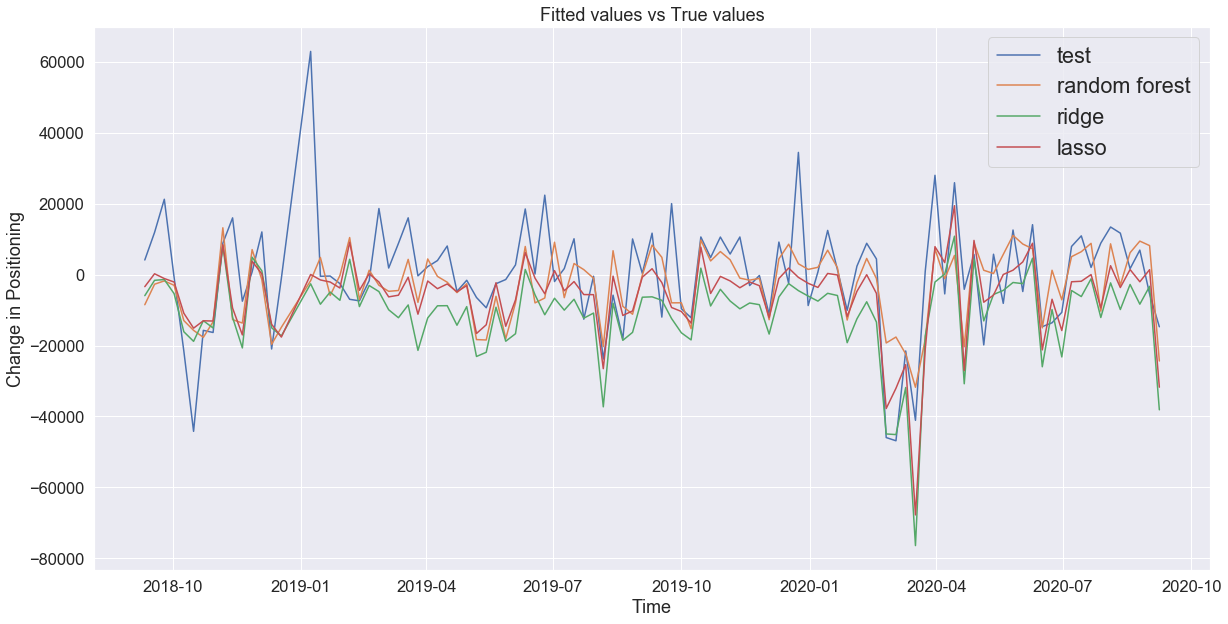

In [66]:
fig = plt.figure(figsize = [20,10])
plt.plot(test_data['Time'], y_test, label = 'test')
plt.plot(test_data['Time'], rf.predict(X_test_std), label = 'random forest')
plt.plot(test_data['Time'], ridge.predict(X_test_std), label = 'ridge')
plt.plot(test_data['Time'], lasso.predict(X_test_std), label = 'lasso')
plt.xlabel("Time")
plt.ylabel("Change in Positioning")
plt.title('Fitted values vs True values')
plt.legend(fontsize = 'large')

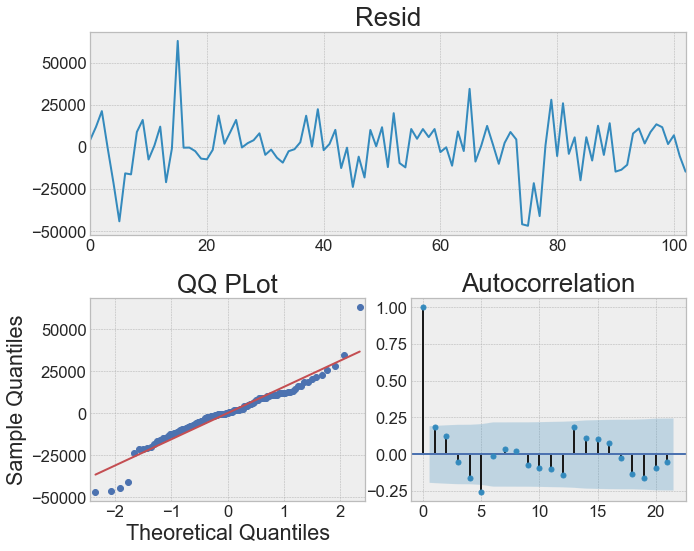

In [67]:
tsplot(y_test, title = 'Resid')

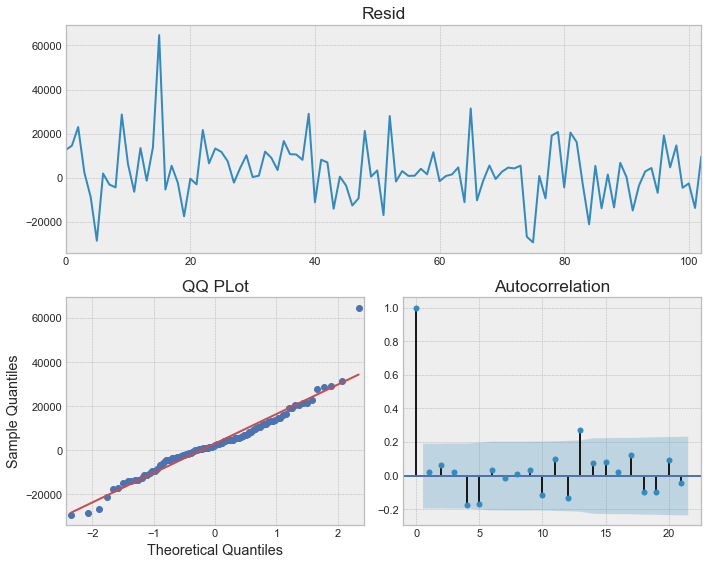

In [68]:
sns.set(font_scale = 1)
sns.set_style("whitegrid")
tsplot(y_test - rf.predict(X_test_std), title = 'Resid')

In [69]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(y_test, lags = 10)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([ 3.66341838,  5.2533667 ,  5.54301269,  8.40126981, 15.81252186,
        15.83202995, 15.98864366, 16.0494404 , 16.74522251, 17.7859109 ]),
 array([0.05561941, 0.07231792, 0.1360885 , 0.07793702, 0.00740022,
        0.0146845 , 0.02522032, 0.04167791, 0.0528585 , 0.05868421]))

In [70]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(y_test - rf.predict(X_test_std), lags = 10)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([0.04763151, 0.46160145, 0.51588398, 3.9346371 , 7.04551519,
        7.17350842, 7.19805064, 7.20464037, 7.31323645, 8.90401714]),
 array([0.82723709, 0.79389765, 0.91538817, 0.41492402, 0.21727724,
        0.30509902, 0.40855449, 0.51472324, 0.60454253, 0.54123635]))

In [71]:
acorr_ljungbox(y_test, lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,3.663418,0.055619
2,5.253367,0.072318
3,5.543013,0.136088
4,8.401270,0.077937
5,15.812522,0.007400
6,15.832030,0.014684
7,15.988644,0.025220
8,16.049440,0.041678
9,16.745223,0.052858
10,17.785911,0.058684


In [72]:
res_before2020

,MSE,MAE
Ridge,2.82983e+08,12870.8
Lasso,2.01269e+08,9751.53
Random Forest,2.08245e+08,9957.04
Lasso1se,1.82682e+08,9277.36


In [73]:
res_2020

,MSE,MAE
Ridge,2.25428e+08,12475.9
Lasso,1.39276e+08,10017.2
Random Forest,1.49686e+08,9410.81
Lasso1se,1.32547e+08,9038.53


#### Random Forest With Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
p = X_train_std.shape[1]
param_grids_random = {
    'max_depth': [2, 3, 5, 6, 8, 10],
    'n_estimators': [2, 5, 10, 15, 20, 25, 30]
}

In [75]:
random_grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grids_random, scoring='neg_mean_absolute_error', cv=tscv, n_iter = 40).fit(X_train_std, y_train)

In [76]:
random_grid_search.best_params_

{'n_estimators': 15, 'max_depth': 8}

By random grid search, the best parameter for random forest is {'n_estimators': 30, 'max_depth': 6}

In [77]:
res_before2020.loc['Random Forest Tuning', 'MSE'] = mean_squared_error(y_test[:ind_year2020], random_grid_search.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Random Forest Tuning', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], random_grid_search.predict(X_test_std[:ind_year2020,:]))

In [78]:
res_2020.loc['Random Forest Tuning', 'MSE'] = mean_squared_error(y_test[ind_year2020:], random_grid_search.predict(X_test_std)[ind_year2020:])
res_2020.loc['Random Forest Tuning', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], random_grid_search.predict(X_test_std)[ind_year2020:])

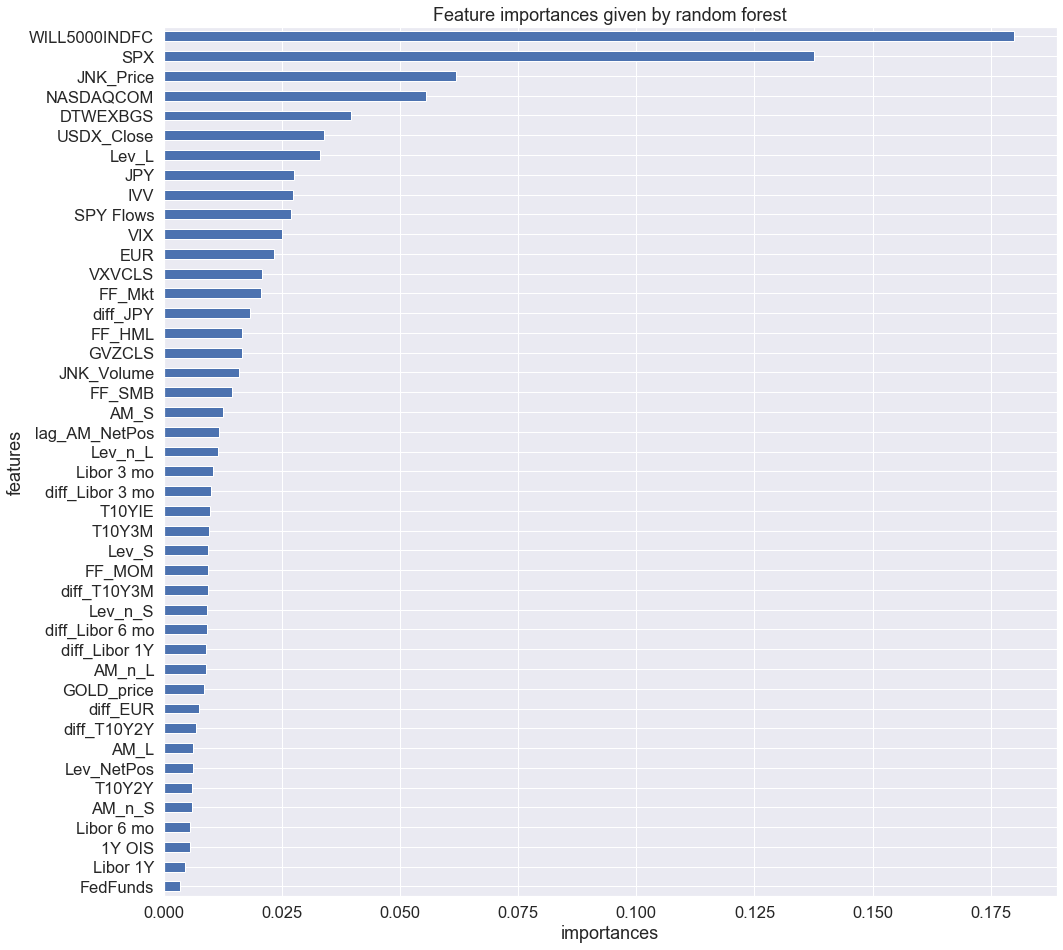

In [79]:
sns.set(font_scale = 1.5)
feat_importance = pd.Series(random_grid_search.best_estimator_.feature_importances_, index = X_train.columns)
fis = np.argsort(feat_importance)
feat_importance = feat_importance[fis]
fig = plt.figure(figsize = [16,16])
ax = fig.subplots(1,1)
feat_importance.plot(kind = 'barh', ax = ax)
plt.ylabel('features')
plt.xlabel('importances')
plt.title("Feature importances given by random forest")
plt.show()

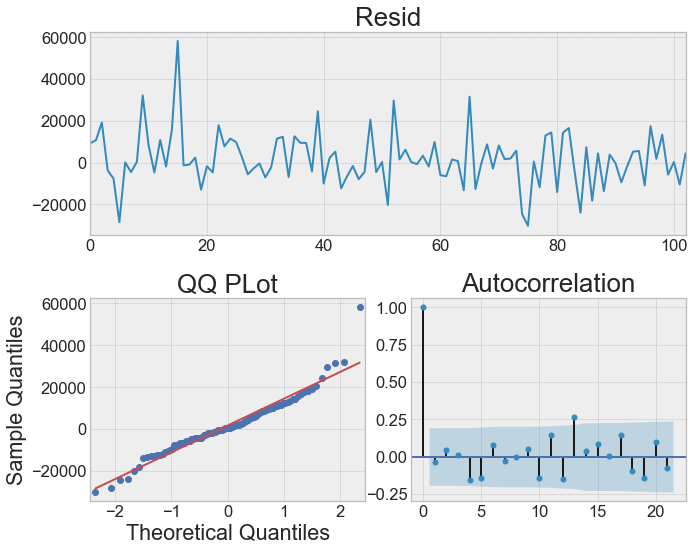

In [80]:
tsplot(y_test - random_grid_search.predict(X_test_std), title = 'Resid')

In [81]:
acorr_ljungbox(y_test - random_grid_search.predict(X_test_std), lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,0.134658,0.713651
2,0.337662,0.844652
3,0.352350,0.949900
4,2.961914,0.564219
5,5.160902,0.396561
6,5.822938,0.443314
7,5.924800,0.548557
8,5.925154,0.655616
9,6.226140,0.717089
10,8.722514,0.558625


Text(0, 0.5, 'Fitted Data')

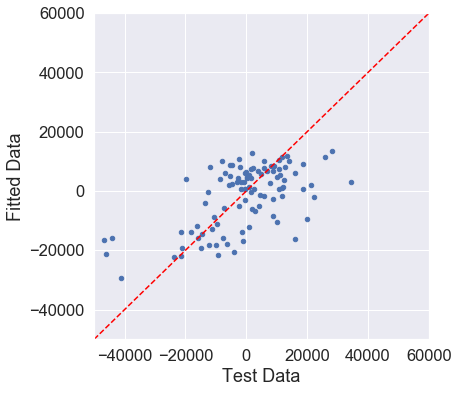

In [82]:
fig = plt.figure(figsize = [6,6])
ax = fig.subplots(1,1)
ax.scatter(y_test, random_grid_search.predict(X_test_std), s = 20)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
ax.set(xlim=(-50000, 60000), ylim=(-50000, 60000))
ax.set_xlabel("Test Data")
ax.set_ylabel("Fitted Data")

We can see our model tends to overestimate the change in positioning data.

#### Elastic Net

In [83]:
from sklearn.linear_model import ElasticNetCV
elastic = ElasticNetCV(l1_ratio = np.linspace(0.4, 1, 10), alphas = np.logspace(1,2,20, base = np.exp(1)), max_iter = 10000, cv= tscv)
elastic.fit(X_train_std, y_train)

ElasticNetCV(alphas=array([2.71828183, 2.86518116, 3.02001911, 3.18322469, 3.35525011,
       3.53657199, 3.72769274, 3.92914189, 4.1414776 , 4.36528819,
       4.60119379, 4.84984802, 5.11193983, 5.38819541, 5.67938019,
       5.98630095, 6.30980809, 6.65079796, 7.01021535, 7.3890561 ]),
             cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             l1_ratio=array([0.4       , 0.46666667, 0.53333333, 0.6       , 0.66666667,
       0.73333333, 0.8       , 0.86666667, 0.93333333, 1.        ]),
             max_iter=10000)

In [84]:
np.log(elastic.alpha_)

1.789473684210526

In [85]:
elastic.l1_ratio_

0.9333333333333333

In [86]:
res_before2020.loc['Elastic Net', 'MSE'] = mean_squared_error(y_test[:ind_year2020], elastic.predict(X_test_std)[:ind_year2020])
res_before2020.loc['Elastic Net', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], elastic.predict(X_test_std)[:ind_year2020])

In [87]:
res_2020.loc['Elastic Net', 'MSE'] = mean_squared_error(y_test[ind_year2020:], elastic.predict(X_test_std)[ind_year2020:])
res_2020.loc['Elastic Net', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], elastic.predict(X_test_std)[ind_year2020:])

In [88]:
X_train.columns[np.abs(elastic.coef_ - 0) > 1e-4]

Index(['FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo', 'T10Y3M', 'T10Y2Y',
       'T10YIE', 'JNK_Price', 'SPX', 'WILL5000INDFC', 'NASDAQCOM',
       'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS', 'JPY', 'EUR', 'USDX_Close',
       'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML', 'FF_MOM', 'Lev_NetPos',
       'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L',
       'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume', 'lag_AM_NetPos',
       'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y', 'diff_T10Y3M',
       'diff_T10Y2Y', 'diff_JPY', 'diff_EUR'],
      dtype='object')

#### SVR

In [89]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve


In [90]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=tscv,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)}).fit(X_train_std, y_train)

In [91]:
svr.best_params_

{'C': 1000.0, 'gamma': 0.01}

In [92]:
res_before2020.loc['SVR', 'MSE'] = mean_squared_error(y_test[:ind_year2020], svr.predict(X_test_std)[:ind_year2020])
res_before2020.loc['SVR', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], svr.predict(X_test_std)[:ind_year2020])

In [93]:
res_2020.loc['SVR', 'MSE'] = mean_squared_error(y_test[ind_year2020:], svr.predict(X_test_std)[ind_year2020:])
res_2020.loc['SVR', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], svr.predict(X_test_std)[ind_year2020:])

In [94]:
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# sns.set(font_scale = 2)
# fig = plt.figure(figsize = [32,32])
# ax = fig.gca(projection='3d')

# # Make data.
# X = np.log(elastic.alphas_)
# Y = np.linspace(0.4, 1, 50)
# X, Y = np.meshgrid(X, Y)
# Z = elastic.mse_path_.mean(axis = 2)

# # Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# # Customize the z axis.
# #ax.set_zlim(-1.01, 1.01)
# # ax.zaxis.set_major_locator(LinearLocator(10))
# # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# ax.set_xlabel("Penalty")
# ax.set_ylabel("L1-ratio")
# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()

#### Examine those important variables

In [95]:
lasso_pick = X_train.columns[np.abs(lasso.coef_ - 0) > 1e-4]
lasso_pick

Index(['SPX', 'GOLD_price', 'VIX', 'EUR', 'FF_Mkt', 'FF_SMB', 'AM_S', 'Lev_L',
       'SPY Flows', 'JNK_Volume', 'lag_AM_NetPos', 'diff_EUR'],
      dtype='object')

In [96]:
rf_pick = feat_importance[-10:].index
rf_pick

Index(['SPY Flows', 'IVV', 'JPY', 'Lev_L', 'USDX_Close', 'DTWEXBGS',
       'NASDAQCOM', 'JNK_Price', 'SPX', 'WILL5000INDFC'],
      dtype='object')

In [97]:
common_pick = set(rf_pick).intersection(set(lasso_pick))
common_pick

{'Lev_L', 'SPX', 'SPY Flows'}

In [98]:
X_train.columns

Index(['FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo', 'Libor 1Y', 'T10Y3M',
       'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX', 'WILL5000INDFC', 'NASDAQCOM',
       'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS', 'JPY', 'EUR', 'USDX_Close',
       'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML', 'FF_MOM', 'Lev_NetPos',
       'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L',
       'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume', 'lag_AM_NetPos',
       'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y', 'diff_T10Y3M',
       'diff_T10Y2Y', 'diff_JPY', 'diff_EUR'],
      dtype='object')

In [21]:
## [ 9, 13, 17, 21, 33, 36]
#pickout = np.arange(len(X_train.columns))[np.isin(X_train.columns, np.array([i for i in common_pick]))]
pickout = [ 9, 13, 17, 21, 33, 36]

In [22]:
X_train.columns[pickout]

Index(['SPX', 'VIX', 'EUR', 'FF_SMB', 'SPY Flows', 'lag_AM_NetPos'], dtype='object')

In [101]:
res_before2020

,MSE,MAE
Ridge,2.82983e+08,12870.8
Lasso,2.01269e+08,9751.53
Random Forest,2.08245e+08,9957.04
Lasso1se,1.82682e+08,9277.36
Random Forest Tuning,1.82561e+08,9245.47
Elastic Net,2.3293e+08,11186.3
SVR,2.06738e+08,9865.94


In [58]:
X_train_sel = X_train.iloc[:,pickout]
X_test_sel = X_test.iloc[:,pickout]

__REQUIRES MANUAL CHANGE__

In [59]:
X_train_sel.columns = ['SPX', 'VIX', 'EUR', 'FF_SMB', 'SPYFlows','lag_AM_NetPos']
X_test_sel.columns = ['SPX', 'VIX', 'EUR', 'FF_SMB', 'SPYFlows','lag_AM_NetPos']

In [104]:
r_data_train = pd.concat([X_train_sel, y_train], axis = 1)
r_data_test = pd.concat([X_test_sel, y_test], axis = 1)

In [105]:
import rpy2
%reload_ext rpy2.ipython

In [106]:
%%R -i r_data_train -i r_data_test
head(r_data_train)

           SPX   VIX          EUR  FF_SMB   SPYFlows lag_AM_NetPos dNetPos
0 -0.049365020 34.13  0.006809977 -0.0065  -4424.687        276099  -17663
1 -0.012657985 29.65 -0.034690322 -0.0198 -10835.682        258436   -1699
2  0.065443651 24.56 -0.007701981  0.0160   4171.167        256737   23534
3 -0.010827688 23.93 -0.012111800  0.0065  -1055.807        280271   -4359
4  0.028020822 23.19 -0.008925825 -0.0033   2873.133        275912    -346
5  0.005943403 22.63 -0.017761317 -0.0039   -606.412        275566   -4358


R[write to console]: Loading required package: nlme

R[write to console]: This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.



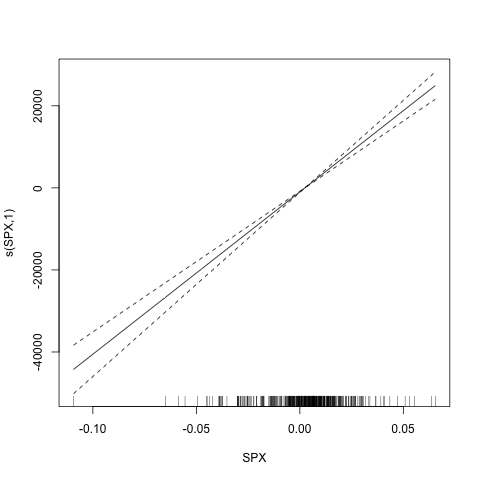

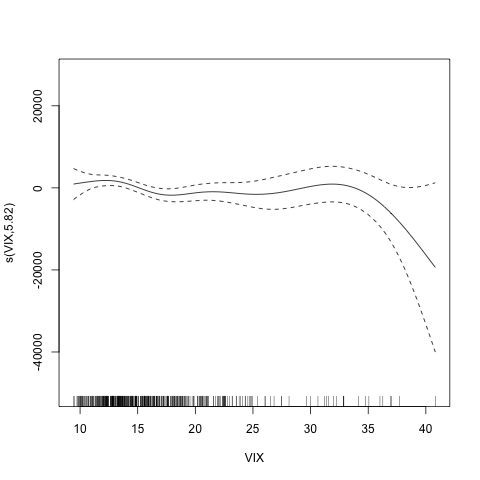

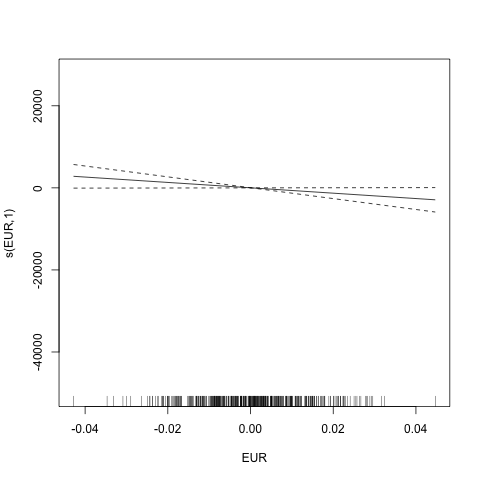

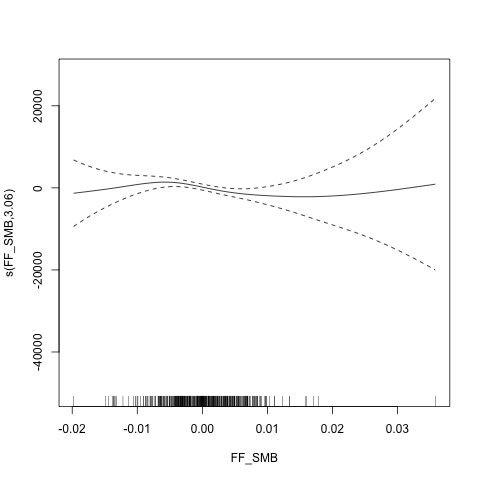

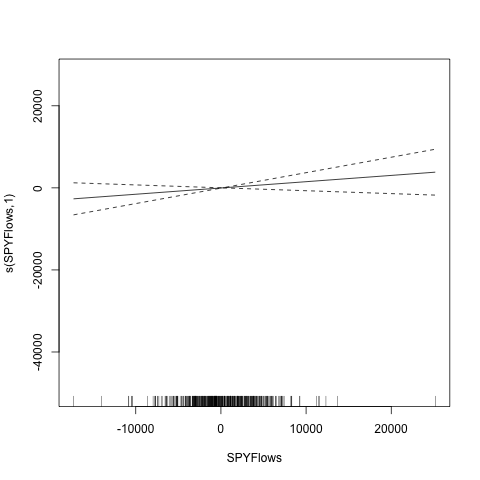

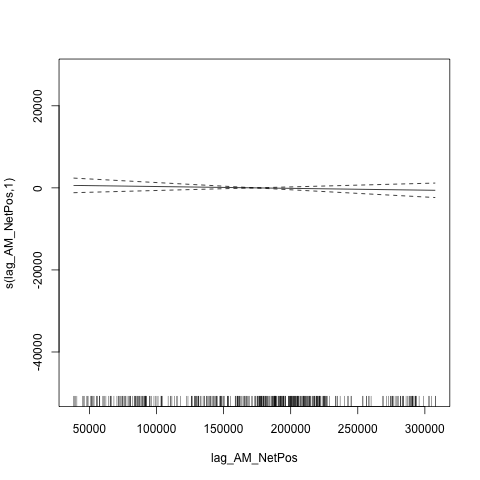

In [107]:
%%R
library(mgcv)
fit = gam(dNetPos ~ s(SPX) + s(VIX) + s(EUR) + s(FF_SMB) + s(SPYFlows) + s(lag_AM_NetPos), data=r_data_train)
plot(fit)

In [108]:
%%R 
summary(fit)


Family: gaussian 
Link function: identity 

Formula:
dNetPos ~ s(SPX) + s(VIX) + s(EUR) + s(FF_SMB) + s(SPYFlows) + 
    s(lag_AM_NetPos)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   -444.5      419.5   -1.06     0.29

Approximate significance of smooth terms:
                   edf Ref.df       F p-value    
s(SPX)           1.000  1.000 223.675  <2e-16 ***
s(VIX)           5.817  6.886   1.936  0.0605 .  
s(EUR)           1.000  1.000   3.821  0.0513 .  
s(FF_SMB)        3.064  3.921   1.810  0.1022    
s(SPYFlows)      1.000  1.000   1.873  0.1719    
s(lag_AM_NetPos) 1.000  1.000   0.456  0.4999    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.496   Deviance explained = 51.1%
GCV = 7.6805e+07  Scale est. = 7.4279e+07  n = 422


In [109]:
%%R -o gam_predict
gam_predict = predict(fit, newdata=r_data_test)

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

p_test = {'min_samples_split':[20,50,80],'max_depth':[2,4,6,8],'n_estimators':[20,30,50]}

In [111]:
clf = GridSearchCV(GradientBoostingRegressor(), param_grid = p_test, cv = tscv,scoring='neg_mean_absolute_error')
clf.fit(X_train_std, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_split': [20, 50, 80],
                         'n_estimators': [20, 30, 50]},
             scoring='neg_mean_absolute_error')

In [112]:
clf.best_params_

{'max_depth': 8, 'min_samples_split': 50, 'n_estimators': 20}

In [113]:
params = {'n_estimators': 30, 'max_depth': 6, 'min_samples_split': 50,
          'learning_rate': 0.05}
clf = GradientBoostingRegressor(**params).fit(X_train, y_train)

In [114]:
res_before2020.loc['GBM', 'MSE'] = mean_squared_error(y_test[:ind_year2020],clf.predict(X_test_std)[:ind_year2020])
res_before2020.loc['GBM', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], clf.predict(X_test_std)[:ind_year2020])

In [115]:
res_2020.loc['GBM', 'MSE'] = mean_squared_error(y_test[ind_year2020:], clf.predict(X_test_std)[ind_year2020:])
res_2020.loc['GBM', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], clf.predict(X_test_std)[ind_year2020:])

In [116]:
res_before2020.loc['GAM', 'MSE'] = mean_squared_error(y_test[:ind_year2020], gam_predict[:ind_year2020])
res_before2020.loc['GAM', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], gam_predict[:ind_year2020])

In [117]:
res_before2020

,MSE,MAE
Ridge,2.82983e+08,12870.8
Lasso,2.01269e+08,9751.53
Random Forest,2.08245e+08,9957.04
Lasso1se,1.82682e+08,9277.36
Random Forest Tuning,1.82561e+08,9245.47
Elastic Net,2.3293e+08,11186.3
SVR,2.06738e+08,9865.94
GBM,4.14239e+08,16577.2
GAM,1.70602e+08,8891.22


In [118]:
res_2020.loc['GAM', 'MSE'] = mean_squared_error(y_test[ind_year2020:], gam_predict[ind_year2020:])
res_2020.loc['GAM', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], gam_predict[ind_year2020:])

In [119]:
res_2020

,MSE,MAE
Ridge,2.25428e+08,12475.9
Lasso,1.39276e+08,10017.2
Random Forest,1.49686e+08,9410.81
Lasso1se,1.32547e+08,9038.53
Random Forest Tuning,1.39134e+08,9199.91
Elastic Net,1.64053e+08,10980.1
SVR,2.55462e+08,11958.9
GBM,2.38308e+08,13012.5
GAM,1.45041e+09,19321.2


In [120]:
clf2 = GridSearchCV(GradientBoostingRegressor(), param_grid = p_test, cv = tscv,scoring='neg_mean_absolute_error')
clf2.fit(X_train_sel, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_split': [20, 50, 80],
                         'n_estimators': [20, 30, 50]},
             scoring='neg_mean_absolute_error')

In [121]:
clf2.best_params_

{'max_depth': 2, 'min_samples_split': 50, 'n_estimators': 20}

In [60]:
params = {'n_estimators': 20, 'max_depth': 2, 'min_samples_split': 50,
          'learning_rate': 0.05}
clf2 = GradientBoostingRegressor(**params).fit(X_train_sel, y_train)

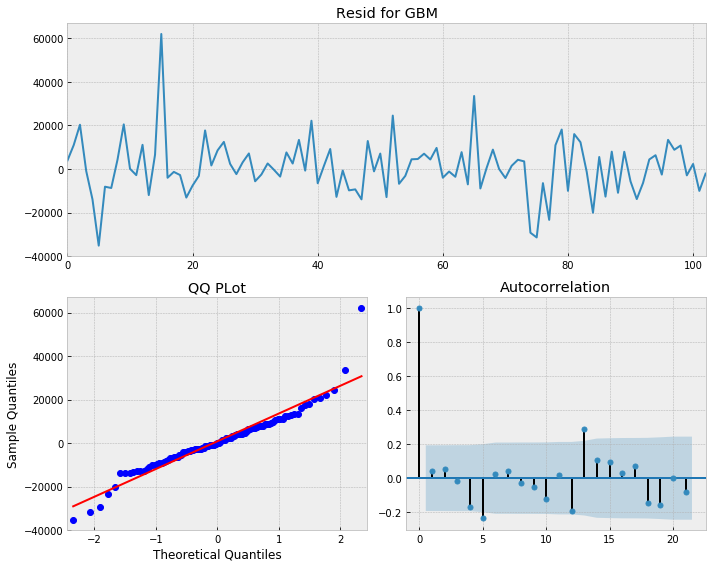

In [61]:
tsplot(y_test - clf2.predict(X_test_sel), title = 'Resid for GBM')

Text(0, 0.5, 'Fitted Data')

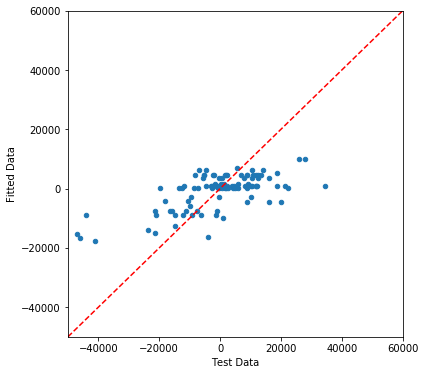

In [63]:
fig = plt.figure(figsize = [6,6])
ax = fig.subplots(1,1)
ax.scatter(y_test, clf2.predict(X_test_sel), s = 20)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
ax.set(xlim=(-50000, 60000), ylim=(-50000, 60000))
ax.set_xlabel("Test Data")
ax.set_ylabel("Fitted Data")

In [123]:
res_before2020.loc['GBM after selection', 'MSE'] = mean_squared_error(y_test[:ind_year2020],clf2.predict(X_test_sel)[:ind_year2020])
res_before2020.loc['GBM after selection', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], clf2.predict(X_test_sel)[:ind_year2020])

In [124]:
res_2020.loc['GBM after selection', 'MSE'] = mean_squared_error(y_test[ind_year2020:], clf2.predict(X_test_sel)[ind_year2020:])
res_2020.loc['GBM after selection', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], clf2.predict(X_test_sel)[ind_year2020:])

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["features"] = X_train_sel.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_sel.values,i) for i in range(len(X_train_sel.columns))]
print(vif_data)

        features       VIF
0            SPX  1.281030
1            VIX  5.357630
2            EUR  1.022710
3         FF_SMB  1.008293
4       SPYFlows  1.242282
5  lag_AM_NetPos  5.397753


In [125]:
res_before2020

,MSE,MAE
Ridge,2.82983e+08,12870.8
Lasso,2.01269e+08,9751.53
Random Forest,2.08245e+08,9957.04
Lasso1se,1.82682e+08,9277.36
Random Forest Tuning,1.82561e+08,9245.47
Elastic Net,2.3293e+08,11186.3
SVR,2.06738e+08,9865.94
GBM,4.14239e+08,16577.2
GAM,1.70602e+08,8891.22
GBM after selection,1.74196e+08,8931.36


In [126]:
res_2020

,MSE,MAE
Ridge,2.25428e+08,12475.9
Lasso,1.39276e+08,10017.2
Random Forest,1.49686e+08,9410.81
Lasso1se,1.32547e+08,9038.53
Random Forest Tuning,1.39134e+08,9199.91
Elastic Net,1.64053e+08,10980.1
SVR,2.55462e+08,11958.9
GBM,2.38308e+08,13012.5
GAM,1.45041e+09,19321.2
GBM after selection,1.44137e+08,9360.69
